In [220]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [221]:
import pickle
########### LOAD DATA
# The data consists of 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25):
data_file_name = "risorse/Ising2DFM_reSample_L40_T=All.pkl"
# The labels are obtained from the following file:
label_file_name = "risorse/Ising2DFM_reSample_L40_T=All_labels.pkl"
#DATA
with open(data_file_name, 'rb') as f:
    print(f)
    X = pickle.load(f)
X = np.unpackbits(X).reshape(-1, 1600) # Decompress array and reshape for convenience
X=X.astype('int')
X[np.where(X==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)
#LABELS (convention is 1 for ordered states and 0 for disordered states)
with open(label_file_name, 'rb') as f:
    labels = pickle.load(f)

<_io.BufferedReader name='risorse/Ising2DFM_reSample_L40_T=All.pkl'>


In [222]:
#reshaping by temperature
X = np.reshape(X, (16, 10000, 1600))


In [223]:
#chooseing randomly data from each batch
index_chosen = []
X_chosen = []
sample_number = 100

for i in range(16):
    index_chosen.extend(random.choice(1600, sample_number).tolist())
    for j in index_chosen:
        X_chosen.append(X[i][j])
    index_chosen = []
print(X_chosen)

[array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]), array([-1, -1, -1, ..., -1, -1, -1]), array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]), array([-1, -1, -1, ..., -1, -1, -1]), array([-1, -1, -1, ..., -1, -1, -1]), array([-1, -1, -1, ..., -1, -1, -1]), array([1, 1, 1, ..., 1, 1, 1]), array([-1, -1, -1, ..., -1, -1, -1]), array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]), array([-1, -1, -1, ..., -1, -1, -1]), array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]), array([-1, -1, -1, ..., -1, -1, -1]), array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]), array([-1, -1, -1, ..., -1, -1, -1]), array([-1, -1, -1, ..., -1, -1, -1]), array([-1, -1, -1, ..., -1, -1, -1]), array([-1, -1, -1, ..., -1, -1, -1]), array([1, 1, 1, ..., 1, 1, 1]), array([-1, -1, -1, ..., -1, -1, -1]), array([1, 1, 1, ..., 1, 1, 1]), array([-1, -1, -1, ..., -1, -1,

(array([413.,  35.,   7.,  23., 334., 334.,  19.,   9.,  31., 395.]),
 array([-1600., -1280.,  -960.,  -640.,  -320.,     0.,   320.,   640.,
          960.,  1280.,  1600.]),
 <BarContainer object of 10 artists>)

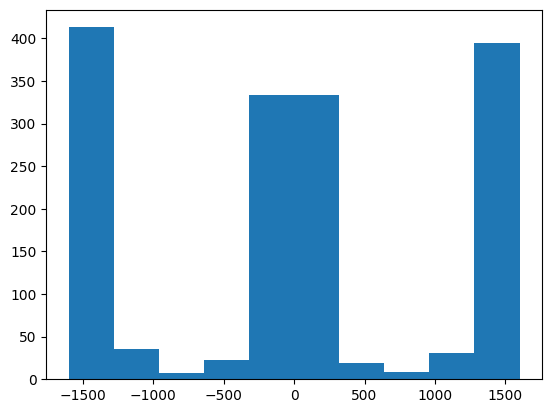

In [224]:
#renaming X_chosen to X
X = np.array(X_chosen)
fig, ax = plt.subplots()
ax.hist(np.sum(X, axis = 1))

In [225]:
#calculating covariance matrix
cov = X.T@X/(X.shape[0]-1)
cov

array([[1.00062539, 0.69418386, 0.59287054, ..., 0.55909944, 0.6166354 ,
        0.64915572],
       [0.69418386, 1.00062539, 0.68918074, ..., 0.56035022, 0.58036273,
        0.59287054],
       [0.59287054, 0.68918074, 1.00062539, ..., 0.52908068, 0.561601  ,
        0.57410882],
       ...,
       [0.55909944, 0.56035022, 0.52908068, ..., 1.00062539, 0.67542214,
        0.58286429],
       [0.6166354 , 0.58036273, 0.561601  , ..., 0.67542214, 1.00062539,
        0.70794246],
       [0.64915572, 0.59287054, 0.57410882, ..., 0.58286429, 0.70794246,
        1.00062539]])

In [226]:
u, s, vt = np.linalg.svd(X)
s

array([1.14624717e+03, 1.20990863e+02, 1.18071430e+02, ...,
       8.31605154e-14, 8.31605154e-14, 5.02882495e-14])

In [227]:
#taking first two components of V matrix
v = vt.T
v_reduced = v[:, 0:2]
print(v_reduced.T)

X_reduced = X@v_reduced
print(X_reduced)

[[-0.02533567 -0.02504807 -0.02514335 ... -0.02484637 -0.024942
  -0.02492516]
 [ 0.02420601  0.04023225  0.03351263 ...  0.03067584  0.03492259
   0.04726921]]
[[-3.99982807e+01  3.45574553e-02]
 [-3.99982807e+01  3.45574553e-02]
 [-3.99982807e+01  3.45574553e-02]
 ...
 [ 1.45194586e+00  3.69218213e+00]
 [-5.47338920e-01 -2.39093167e+00]
 [ 1.23966284e+00  7.47000394e-01]]


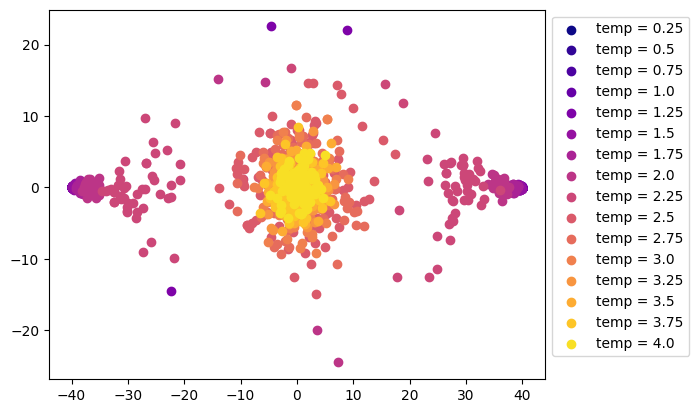

In [228]:
fig, ax = plt.subplots()

#this code is necessary so that colors do not repeat in histogram
cm = plt.get_cmap('plasma')
ax.set_prop_cycle('color', [cm(1.*i/16) for i in range(16)])

for i in range(16):
    ax.scatter(X_reduced[100*i:100*(i+1), 0], X_reduced[100*i:100*(i+1), 1], label = f"temp = {(i+1)*0.25}")
ax.legend(bbox_to_anchor=(1, 1))

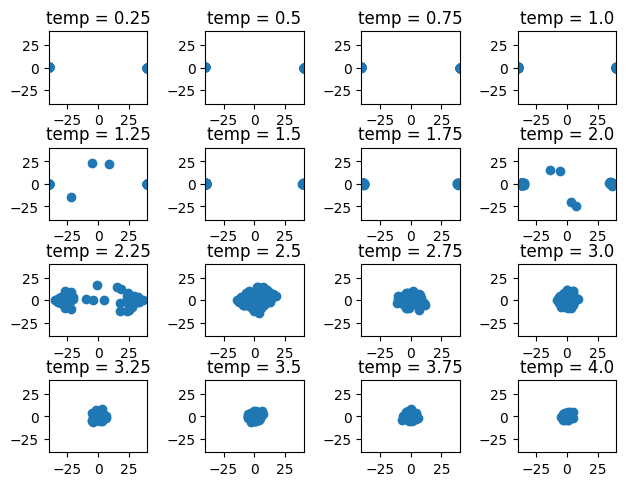

In [229]:
fig, axs = plt.subplots(4,4)
fig.tight_layout()
for i in range(16):
    axs[np.unravel_index(i, (4,4))].scatter(X_reduced[100*i:100*(i+1), 0], X_reduced[100*i:100*(i+1), 1], label = f"temp = {(i+1)*0.25}")
    axs[np.unravel_index(i, (4,4))].set_xlim([-40, 40])
    axs[np.unravel_index(i, (4,4))].set_ylim([-40, 40])
    axs[np.unravel_index(i, (4,4))].set_title(f"temp = {(i+1)*0.25}")


plt.savefig("scatter_plot_matrix", dpi = 800)

In [230]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.singular_values_)
print(pca.explained_variance_ratio_)
print(pca.components_)

[1146.01795496  120.96838679]
[0.51330548 0.00571922]
[[ 0.02535194  0.02504939  0.02513156 ...  0.02484761  0.02492404
   0.02492119]
 [-0.02424257 -0.04042481 -0.03384434 ... -0.03082182 -0.03531791
  -0.04764253]]


In [231]:
X_reduced = X@pca.components_.T

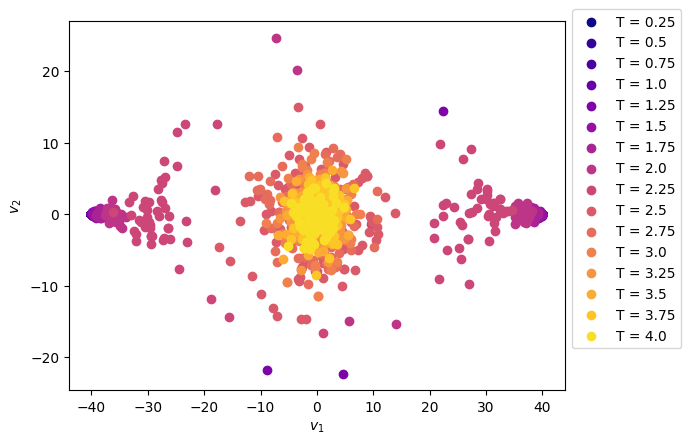

In [237]:
fig, ax = plt.subplots()

cm = plt.get_cmap('plasma')
ax.set_prop_cycle('color', [cm(1.*i/16) for i in range(16)])

for i in range(16):
    ax.scatter(X_reduced[100*i:100*(i+1), 0], X_reduced[100*i:100*(i+1), 1], label = f"T = {(i+1)*0.25}")
ax.legend(bbox_to_anchor=(1, 1.05))
plt.xlabel(r'$v_1$')
plt.ylabel(r'$v_2$')
plt.savefig('relazione/immagini/scatter.png', bbox_inches='tight', dpi = 1000)